# InsightEd - EDA

In [5]:
library(tidyverse)
library(data.table)
library(skimr)
library(janitor) 
library(corrplot)
library(randomForest)

In [6]:
# read and load csv
data <- read.csv("cleaned_data.csv", stringsAsFactors = TRUE)

In [7]:
str(data)

'data.frame':	1205 obs. of  15 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender             : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level    : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type   : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location           : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding      : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition: Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type      : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type       : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration     : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms           : Factor w/ 2 levels "No","Yes": 1

In [8]:
# Convert relevant columns to factors (categorical variables)
categorical_cols <- c("gender", "education_level", "institution_type", "it_student", "location", 
                      "load_shedding", "financial_condition", "internet_type", "network_type", 
                      "class_duration", "self_lms", "device", "adaptivity_level")

data[categorical_cols] <- lapply(data[categorical_cols], factor)

In [9]:
head(data)

,X,gender,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level,age_numeric
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,23
2,2,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate,23
3,3,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,18
4,4,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,13
5,5,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low,18
6,6,Boy,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,13


In [10]:
summary(data)

       X         gender      education_level       institution_type it_student
 Min.   :   1   Boy :663   College   :219    Government    :382     No :901   
 1st Qu.: 302   Girl:542   School    :530    Non Government:823     Yes:304   
 Median : 603              University:456                                     
 Mean   : 603                                                                 
 3rd Qu.: 904                                                                 
 Max.   :1205                                                                 
 location  load_shedding financial_condition     internet_type network_type
 No :270   High: 201     Mid :878            Mobile Data:695   2G: 19      
 Yes:935   Low :1004     Poor:242            Wifi       :510   3G:411      
                         Rich: 85                              4G:775      
                                                                           
                                                                   

In [11]:
sum(is.na(data))

[1] 0

In [12]:
str(data)

'data.frame':	1205 obs. of  15 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender             : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level    : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type   : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location           : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding      : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition: Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type      : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type       : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration     : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms           : Factor w/ 2 levels "No","Yes": 1

In [13]:
dim(data)

[1] 1205   15

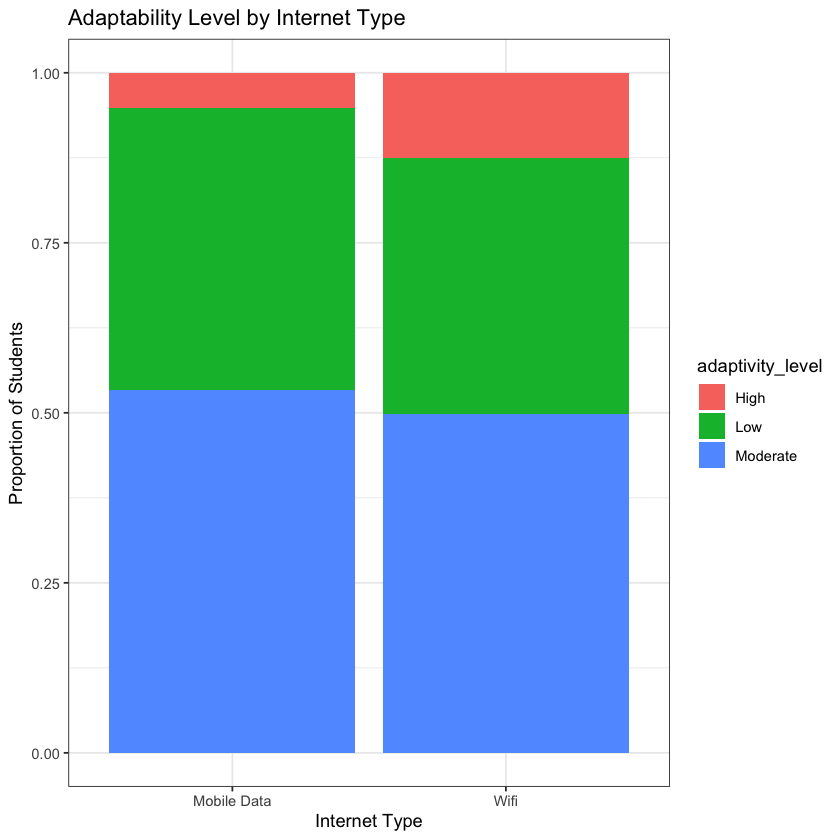

In [14]:
# B. Internet Type vs. Adaptability
data %>%
  ggplot(aes(x = internet_type, fill = adaptivity_level)) +
  geom_bar(position = "fill") +
  labs(title = "Adaptability Level by Internet Type",
       x = "Internet Type",
       y = "Proportion of Students") +
  theme_bw()

In [15]:
# Encode "class_duration" into numerical categories
data$class_duration_num <- case_when(
  data$class_duration == "0" ~ 0,
  data$class_duration == "1-3" ~ 2,
  data$class_duration == "3-6" ~ 4
)

# Encode "financial_condition" to numerical
data$financial_condition_num <- case_when(
  data$financial_condition == "Poor" ~ 1,
  data$financial_condition == "Mid" ~ 2,
  data$financial_condition == "Rich" ~ 3
)

# Encode "internet_type" to numerical
data$internet_type_num <- case_when(
  data$internet_type == "2G" ~ 1,
  data$internet_type == "3G" ~ 2,
  data$internet_type == "4G" ~ 3,
  data$internet_type == "Wifi" ~ 4
)

# Encode "device" to numerical
data$device_num <- case_when(
  data$device == "Mobile" ~ 1,
  data$device == "Tab" ~ 2,
  data$device == "Computer" ~ 3
)

# Create Access Score
data$access_score <- rowMeans(data[, c("financial_condition_num", "internet_type_num", "device_num")], na.rm = TRUE)

# Encode self_lms to numerical
data$self_lms_num <- ifelse(data$self_lms == "Yes",1,0)

#Re-encode adaptivity level to numerical.
data$adaptivity_level_num <- case_when(
  data$adaptivity_level == "Low" ~ 1,
  data$adaptivity_level == "Moderate" ~ 2,
  data$adaptivity_level == "High" ~ 3
)

In [16]:
# Check the modified data
head(data)
str(data)

,X,gender,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,⋯,device,adaptivity_level,age_numeric,class_duration_num,financial_condition_num,internet_type_num,device_num,access_score,self_lms_num,adaptivity_level_num
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,⋯,Tab,Moderate,23,4,2,4,2,2.666667,0,2
2,2,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,⋯,Mobile,Moderate,23,2,2,NA,1,1.500000,1,2
3,3,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,⋯,Mobile,Moderate,18,2,2,4,1,2.333333,0,2
4,4,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,⋯,Mobile,Moderate,13,2,2,NA,1,1.500000,0,2
5,5,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,⋯,Mobile,Low,18,0,1,NA,1,1.000000,0,1
6,6,Boy,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,⋯,Mobile,Low,13,2,1,NA,1,1.000000,0,1


'data.frame':	1205 obs. of  22 variables:
 $ X                      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender                 : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level        : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type       : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student             : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location               : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding          : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition    : Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type          : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type           : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration         : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms 

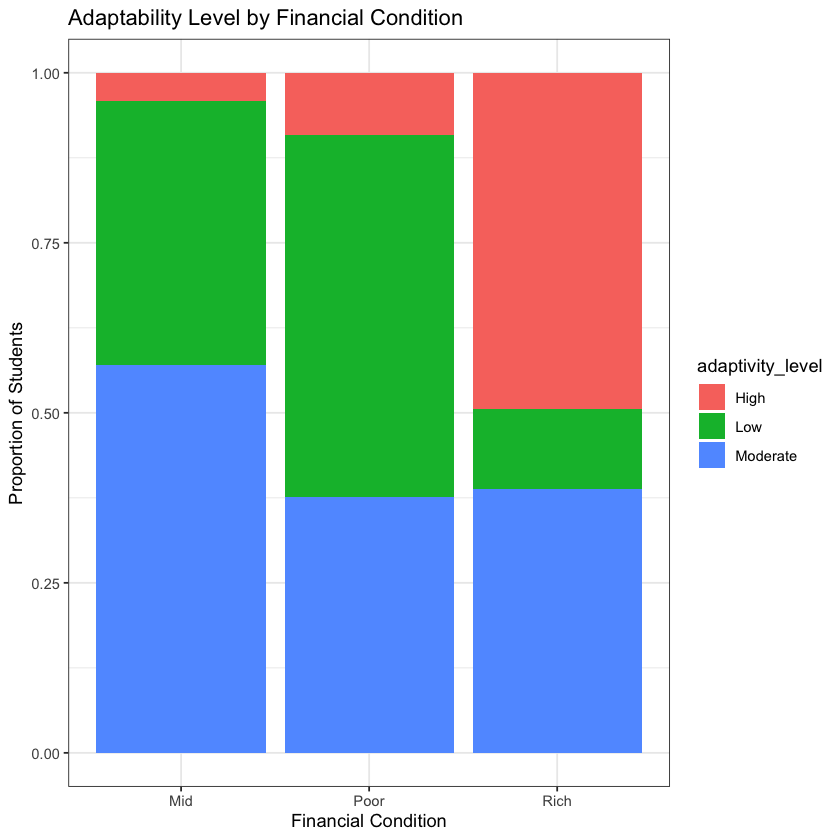

In [17]:
# A. Financial Condition vs. Adaptability
data %>%
  ggplot(aes(x = financial_condition, fill = adaptivity_level)) +
  geom_bar(position = "fill") +
  labs(title = "Adaptability Level by Financial Condition",
       x = "Financial Condition",
       y = "Proportion of Students") +
  theme_bw() # Clean theme

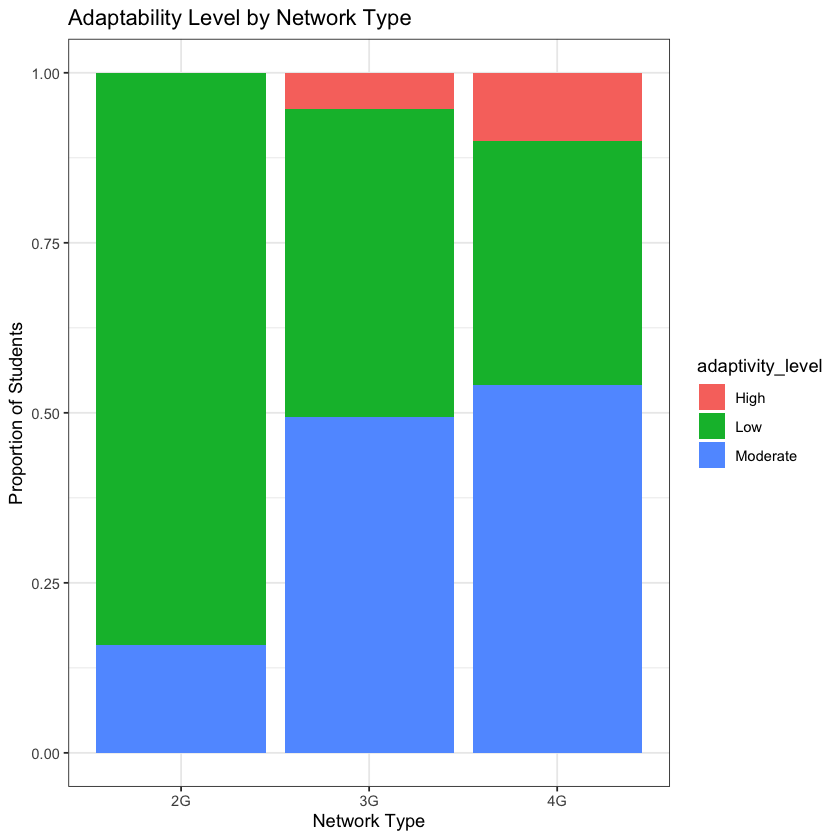

In [18]:
# C. Network Type vs. Adaptability
data %>%
  ggplot(aes(x = network_type, fill = adaptivity_level)) +
  geom_bar(position = "fill") +
  labs(title = "Adaptability Level by Network Type",
       x = "Network Type",
       y = "Proportion of Students") +
  theme_bw()


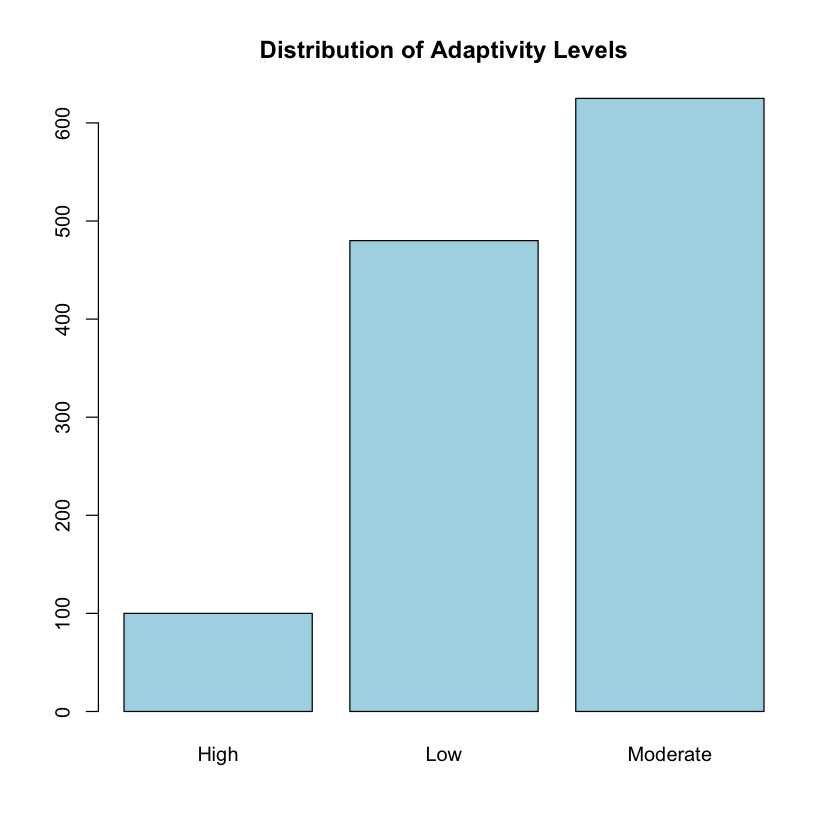

In [19]:
# Interpretation: Understanding the distribution of key variables helps identify balance and coverage in the dataset.
# 1. Univariate Analysis
# Distribution of Adaptivity Level
barplot(table(data$adaptivity_level), main='Distribution of Adaptivity Levels', col='lightblue')

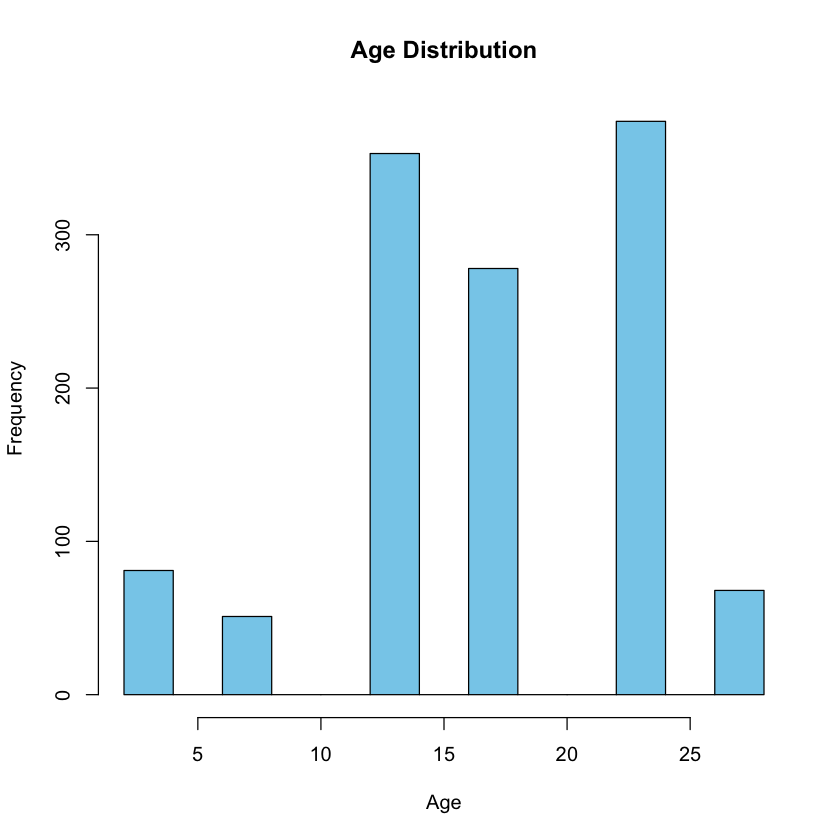

In [20]:
# Age Distribution
hist(data$age_numeric, breaks=10, col='skyblue', main='Age Distribution', xlab='Age')

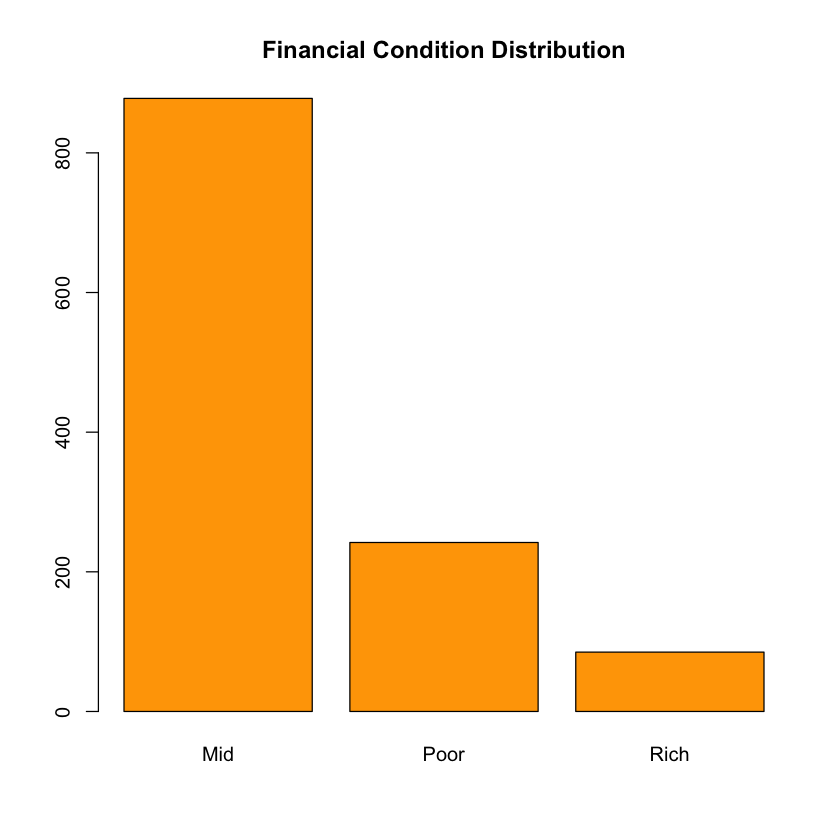

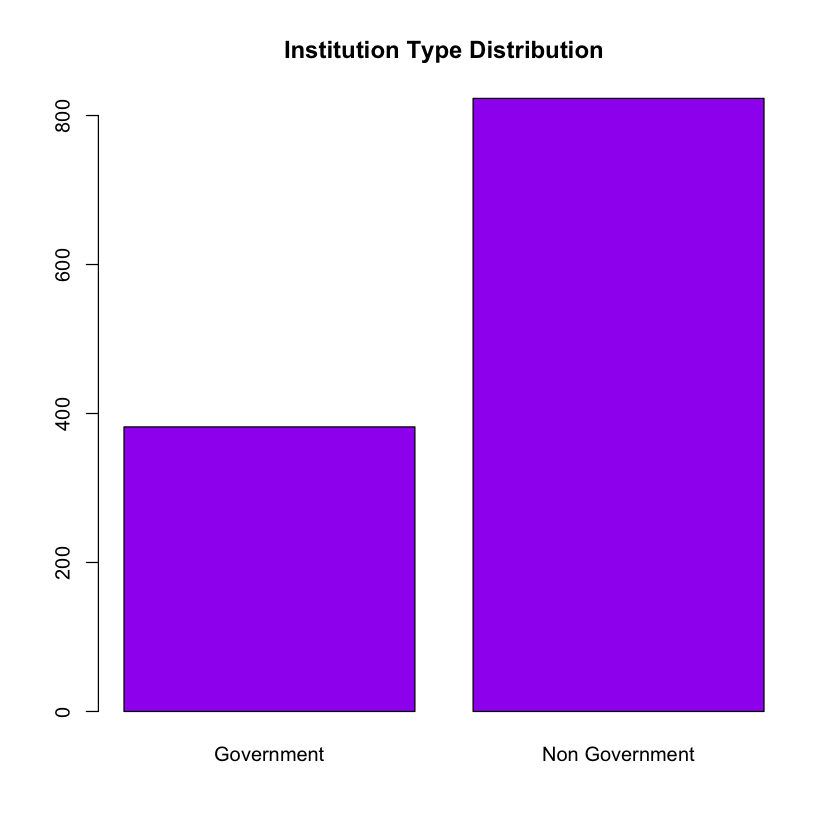

In [21]:
# Financial Condition and Institution Type Counts
barplot(table(data$financial_condition), main='Financial Condition Distribution', col='orange')
barplot(table(data$institution_type), main='Institution Type Distribution', col='purple')

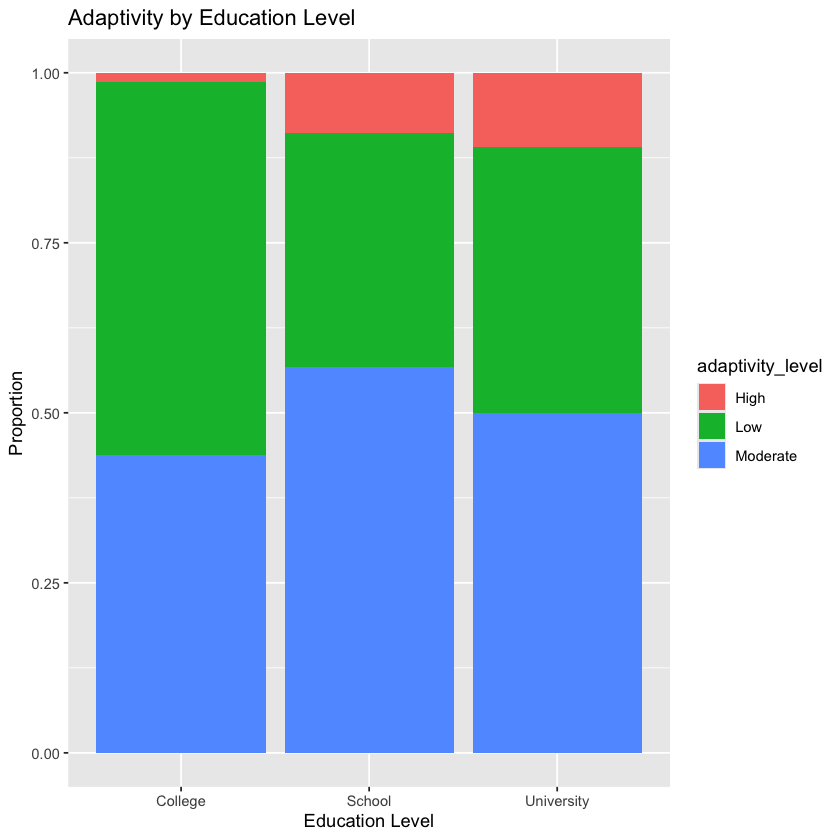

In [22]:
# Interpretation: These visualizations reveal how various factors correlate with adaptability levels.
# 2. Bivariate Analysis

# Adaptivity by Education Level
ggplot(data, aes(x = education_level, fill = adaptivity_level)) +
  geom_bar(position = 'fill') +
  labs(title='Adaptivity by Education Level', x='Education Level', y='Proportion')

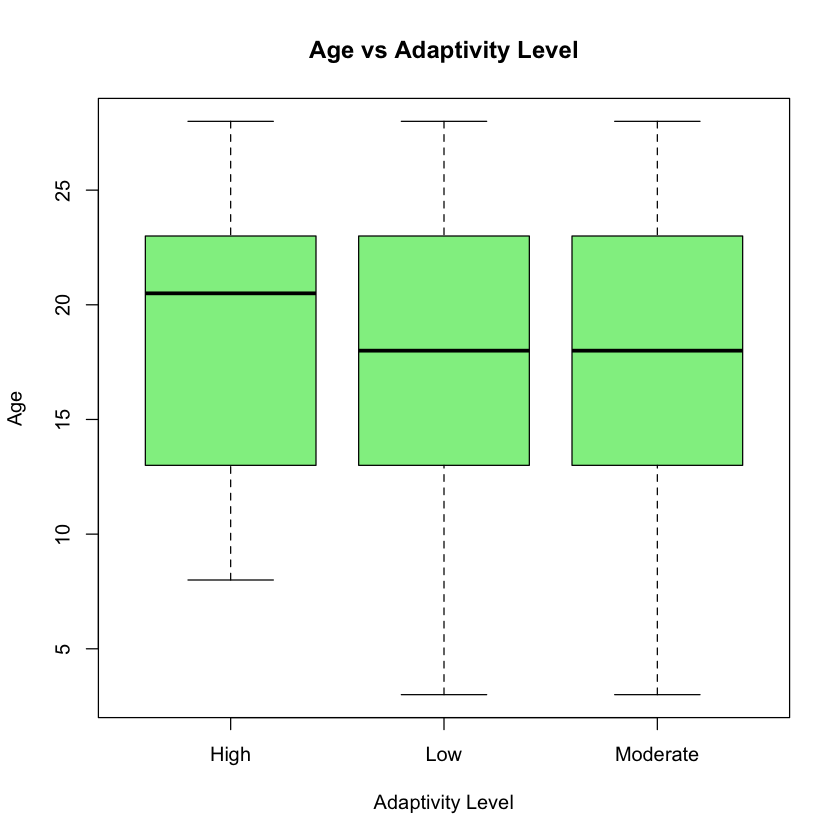

In [23]:
# Age vs. Adaptivity
boxplot(data$age_numeric ~ data$adaptivity_level, col='lightgreen', main='Age vs Adaptivity Level', xlab='Adaptivity Level', ylab='Age')

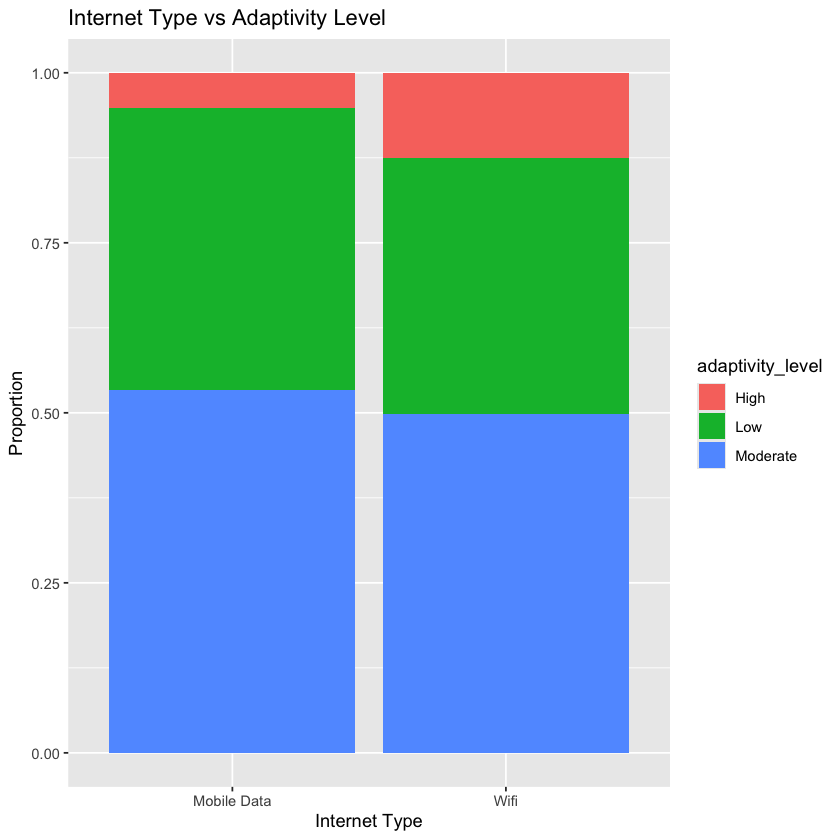

In [24]:
# Internet Type vs. Adaptivity
ggplot(data, aes(x = internet_type, fill = adaptivity_level)) + geom_bar(position = 'fill') + labs(title='Internet Type vs Adaptivity Level', x='Internet Type', y='Proportion')

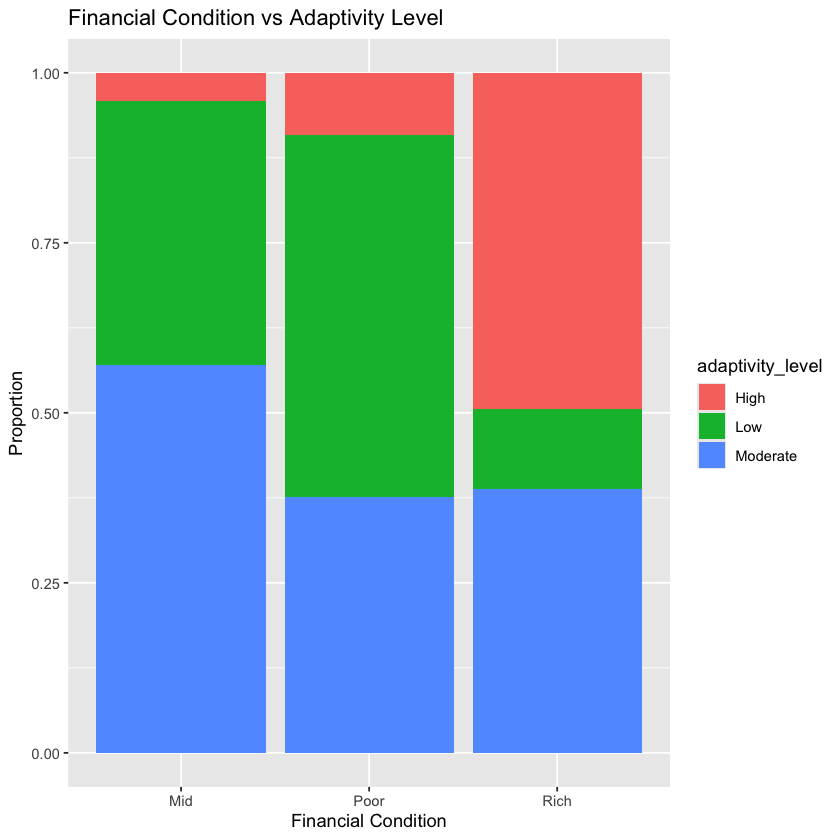

In [25]:
# Financial Condition vs. Adaptivity
ggplot(data, aes(x = financial_condition, fill = adaptivity_level)) +
  geom_bar(position = 'fill') +
  labs(title='Financial Condition vs Adaptivity Level', x='Financial Condition', y='Proportion')

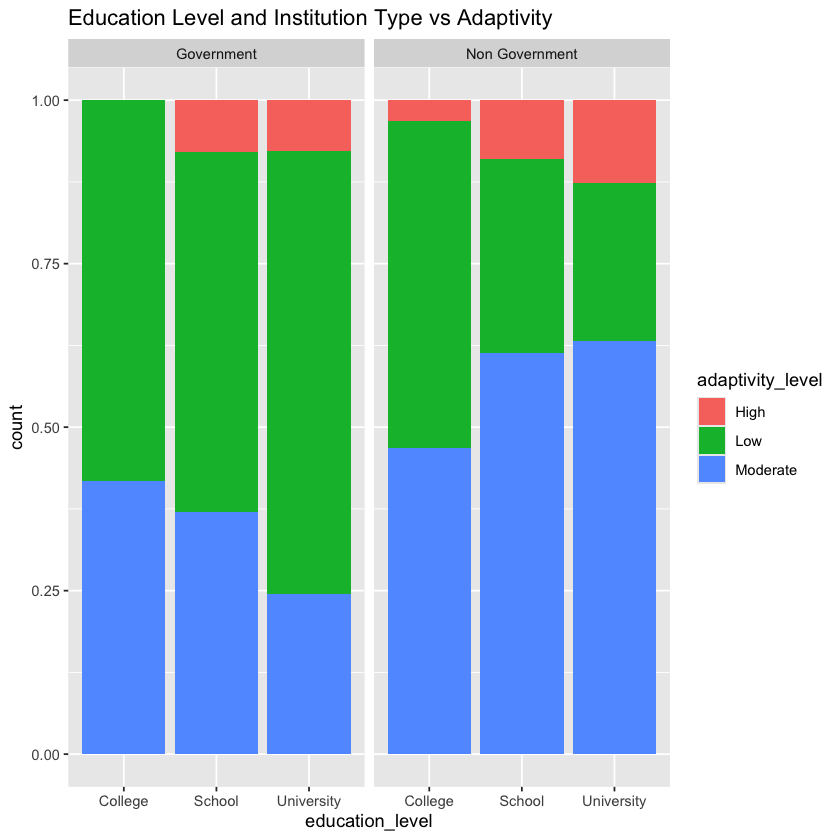

In [33]:
# Interpretation: Combining variables gives deeper insights into the relationships between student characteristics and adaptability.
# 3. Multivariate Analysis

# Education Level + Institution Type vs. Adaptivity
ggplot(data, aes(x = education_level, fill = adaptivity_level)) +
  geom_bar(position = 'fill') +
  facet_wrap(~institution_type) +
  labs(title='Education Level and Institution Type vs Adaptivity')


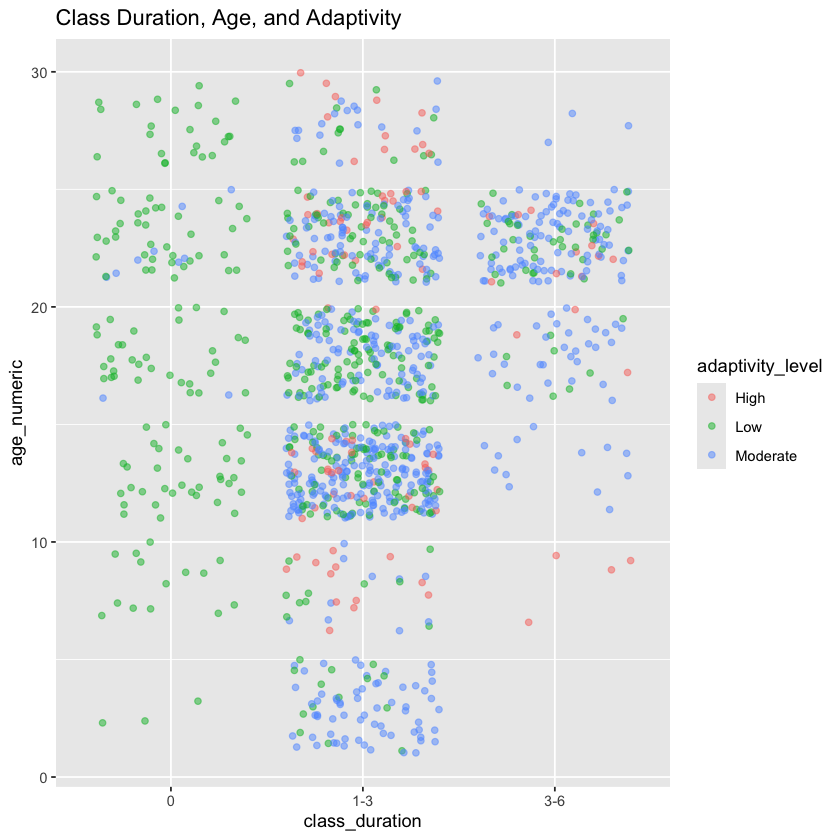

In [34]:
# Age, Class Duration, and Adaptivity
ggplot(data, aes(x = class_duration, y = age_numeric, color = adaptivity_level)) +
  geom_jitter(alpha=0.5) +
  labs(title='Class Duration, Age, and Adaptivity')


In [39]:
findings <- data.frame(
  Analysis = c('Distribution of Adaptivity Level', 'Age Distribution', 'Financial Condition Distribution',
               'Institution Type Distribution', 'Adaptivity by Education Level', 'Age vs Adaptivity',
               'Internet Type vs Adaptivity', 'Financial Condition vs Adaptivity',
               'Education Level and Institution Type vs Adaptivity', 'Class Duration, Age, and Adaptivity',
               'Correlation Analysis', 'Feature Importance'),
  Key_Insights = c('Most students show Moderate adaptability; High adaptability is less common',
                   'Age distribution skews younger with most students between 13-23 years',
                   'Most students come from Mid-level financial conditions',
                   'Non-Government institutions have a larger representation',
                   'College and University students show higher adaptability compared to school-level students',
                   'Older students show higher adaptability levels compared to younger peers',
                   'WiFi users tend to show higher adaptability than Mobile Data users',
                   'Mid and Rich financial backgrounds correlate more with higher adaptability',
                   'University students in Non-Government institutions show the highest adaptability rates',
                   'Longer class durations (3-6 hrs) seem associated with higher adaptability',
                   'Weak correlation between age and numeric variables; no strong linear relationships',
                   'Feature importance ranks education level, financial condition, and internet type as top predictors')
)

print(findings)


                                             Analysis
1                    Distribution of Adaptivity Level
2                                    Age Distribution
3                    Financial Condition Distribution
4                       Institution Type Distribution
5                       Adaptivity by Education Level
6                                   Age vs Adaptivity
7                         Internet Type vs Adaptivity
8                   Financial Condition vs Adaptivity
9  Education Level and Institution Type vs Adaptivity
10                Class Duration, Age, and Adaptivity
11                               Correlation Analysis
12                                 Feature Importance
                                                                                         Key_Insights
1                          Most students show Moderate adaptability; High adaptability is less common
2                               Age distribution skews younger with most students between 13-2

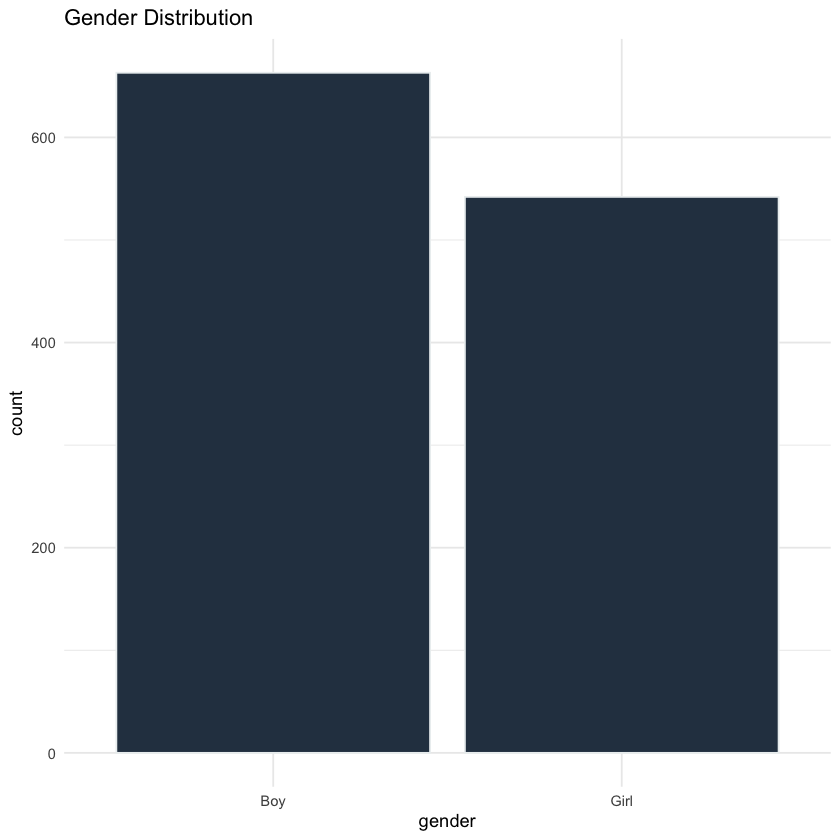

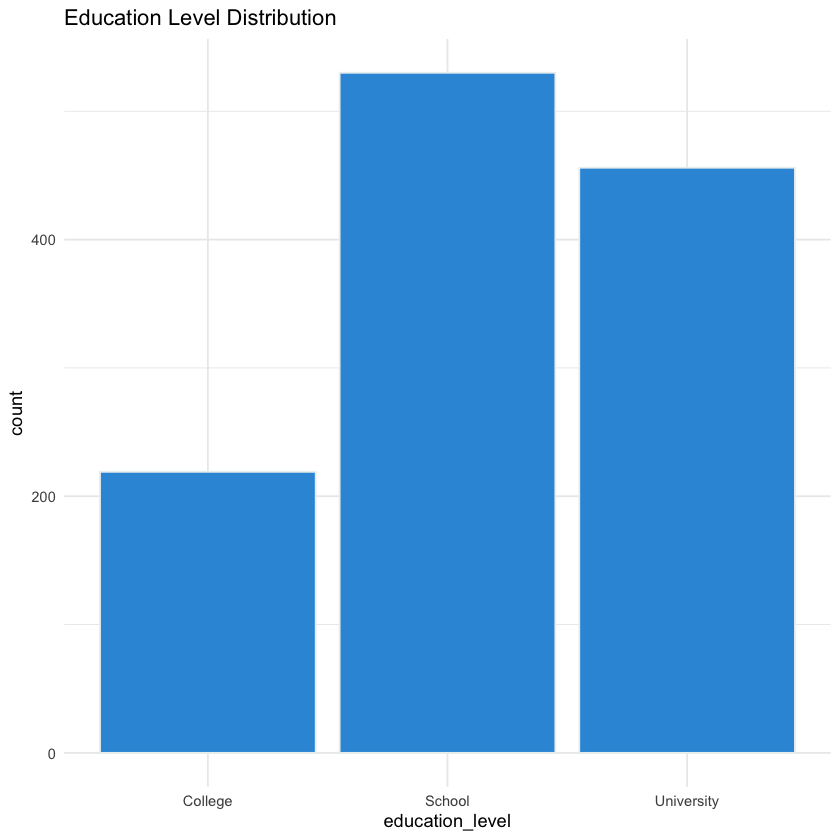

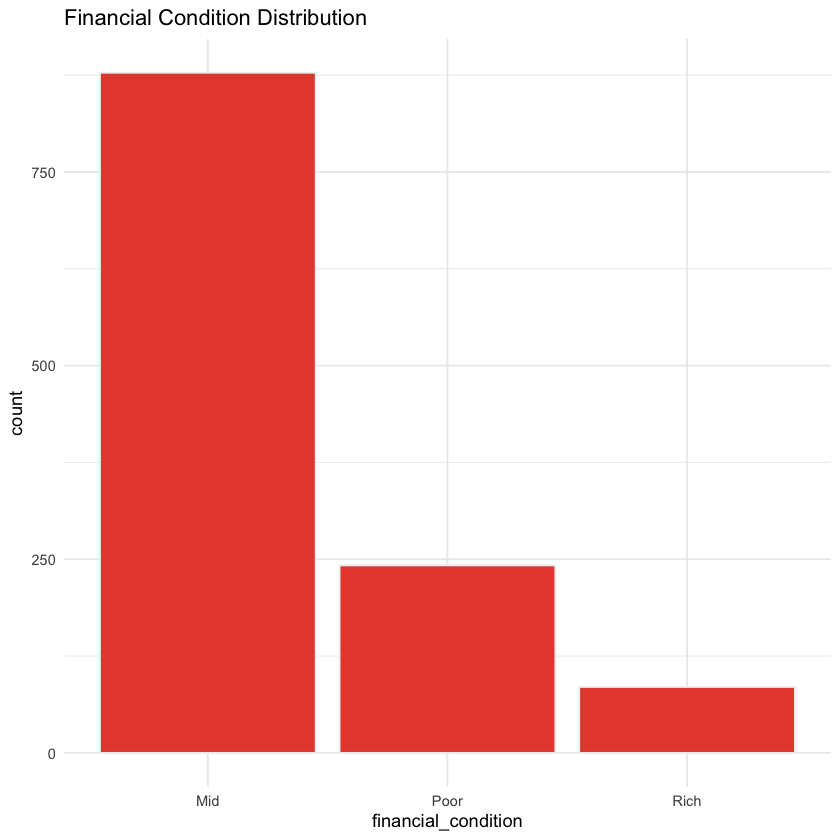

X                  gender         education_level 
                      0                       0                       0 
       institution_type              it_student                location 
                      0                       0                       0 
          load_shedding     financial_condition           internet_type 
                      0                       0                       0 
           network_type          class_duration                self_lms 
                      0                       0                       0 
                 device        adaptivity_level             age_numeric 
                      0                       0                       0 
     class_duration_num financial_condition_num       internet_type_num 
                      0                       0                     695 
             device_num            access_score            self_lms_num 
                      0                       0                       0 
   adaptivity_level_num 
                      0

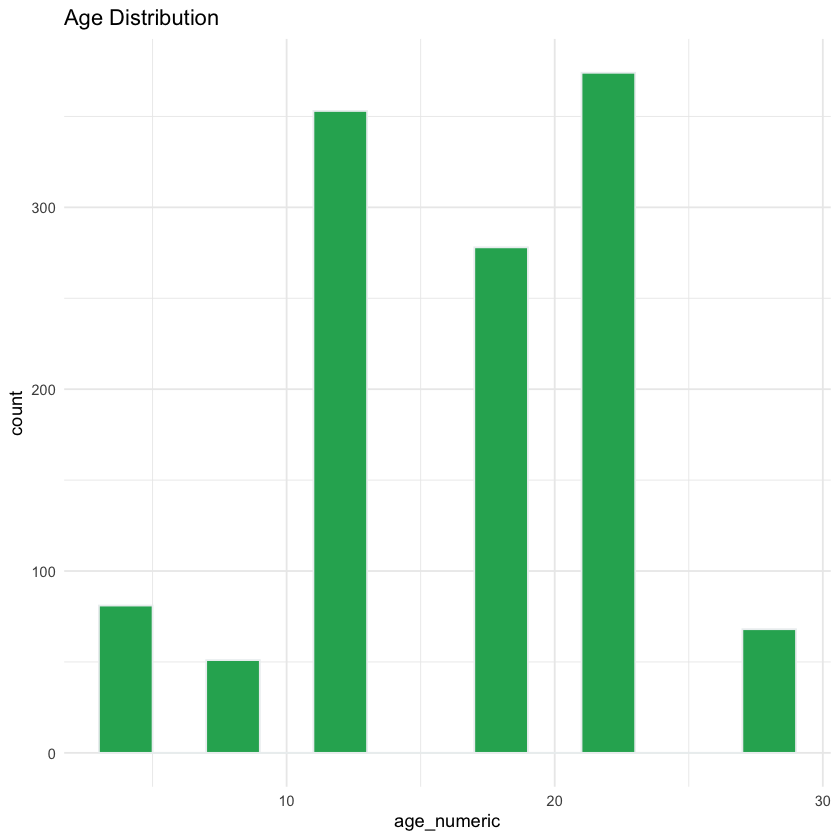

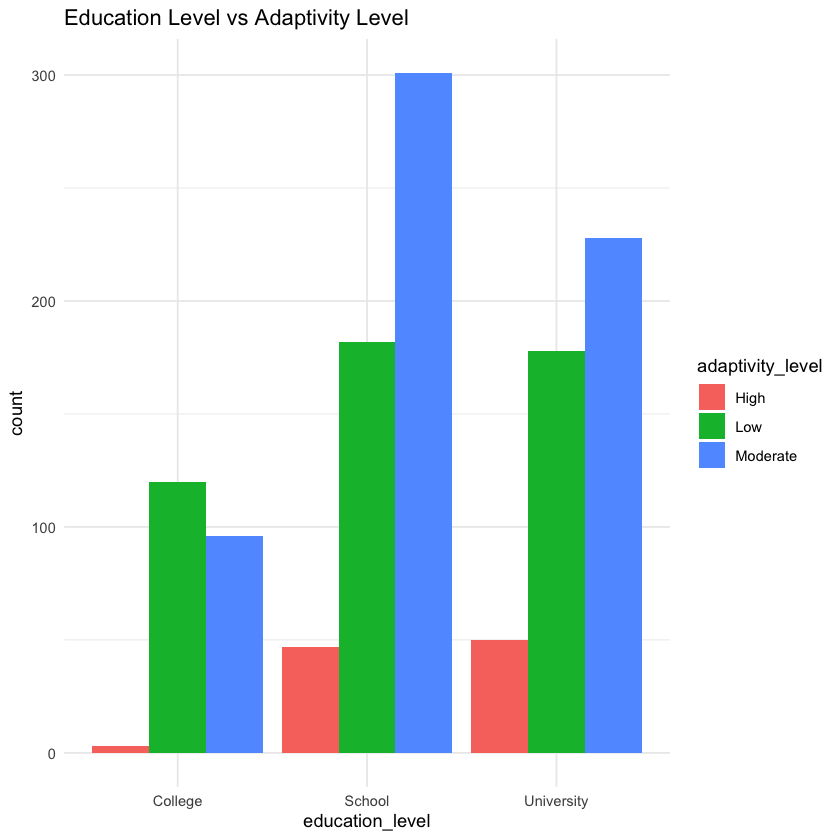

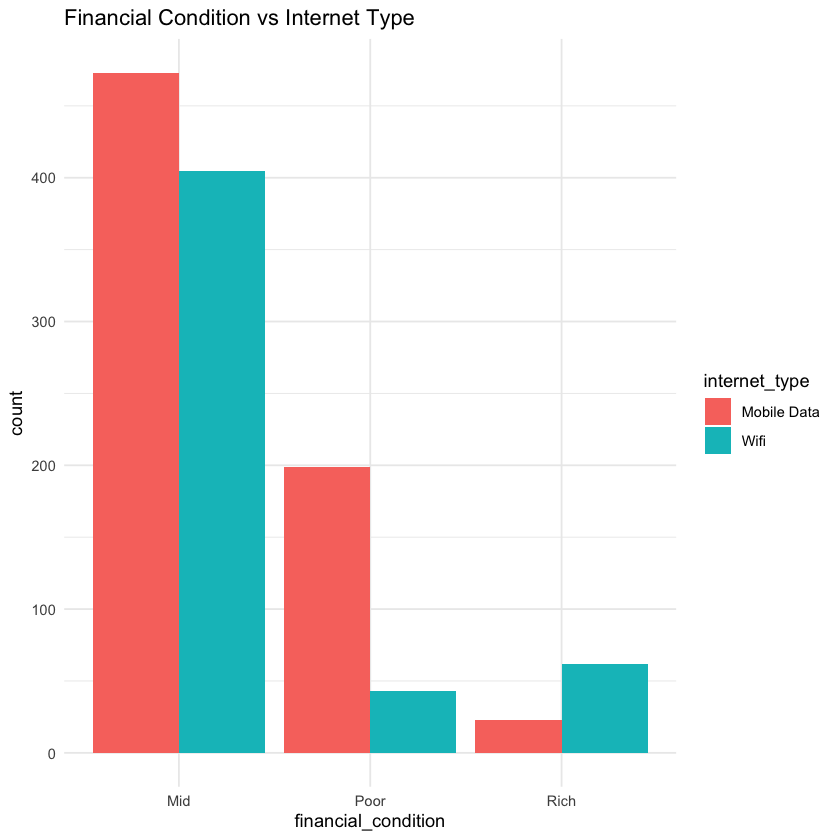

In [40]:
# Visualize gender distribution
ggplot(data, aes(x = gender)) +
  geom_bar(fill = "#2C3E50", color = "#ECF0F1") +
  theme_minimal() +
  ggtitle("Gender Distribution")

# Visualize education level distribution
ggplot(data, aes(x = education_level)) +
  geom_bar(fill = "#3498DB", color = "#ECF0F1") +
  theme_minimal() +
  ggtitle("Education Level Distribution")

# Visualize financial condition
ggplot(data, aes(x = financial_condition)) +
  geom_bar(fill = "#E74C3C", color = "#ECF0F1") +
  theme_minimal() +
  ggtitle("Financial Condition Distribution")

# Visualize age distribution
ggplot(data, aes(x = age_numeric)) +
  geom_histogram(binwidth = 2, fill = "#27AE60", color = "#ECF0F1") +
  theme_minimal() +
  ggtitle("Age Distribution")

# Check for missing values
colSums(is.na(data))

# Explore relationships: Education Level vs. Adaptivity Level
ggplot(data, aes(x = education_level, fill = adaptivity_level)) +
  geom_bar(position = "dodge") +
  theme_minimal() +
  ggtitle("Education Level vs Adaptivity Level")

# Explore relationships: Financial Condition vs. Internet Type
ggplot(data, aes(x = financial_condition, fill = internet_type)) +
  geom_bar(position = "dodge") +
  theme_minimal() +
  ggtitle("Financial Condition vs Internet Type")
